In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib

plt.rcParams['axes.labelsize']=14
plt.rcParams['xtick.labelsize']=12
plt.rcParams['ytick.labelsize']=12

In [2]:
data=pd.read_csv('TABLE_III._Deaths_in_122_U.S._cities.csv')

In [3]:
data.head()# sneak peek

,Reporting Area,MMWR YEAR,MMWR WEEK,"All causes, by age (years), All Ages**","All causes, by age (years), All Ages**, flag","All causes, by age (years), ≥65","All causes, by age (years), ≥65, flag","All causes, by age (years), 45–64","All causes, by age (years), 45–64, flag","All causes, by age (years), 25–44","All causes, by age (years), 25–44, flag","All causes, by age (years), 1–24","All causes, by age (years), 1–24, flag","All causes, by age (years), LT 1","All causes, by age (years), LT 1, flag",P&I† Total,"P&I† Total, flag",Location 1,Location 2
0,New England,2016,1,600.0,NaN,426.0,NaN,125.0,NaN,28.0,NaN,12.0,NaN,9.0,NaN,47.0,NaN,NaN,NaN
1,Mid. Atlantic,2016,1,807.0,NaN,563.0,NaN,181.0,NaN,32.0,NaN,13.0,NaN,18.0,NaN,32.0,NaN,NaN,NaN
2,E.N. Central,2016,1,2468.0,NaN,1611.0,NaN,594.0,NaN,167.0,NaN,62.0,NaN,34.0,NaN,159.0,NaN,NaN,NaN
3,W.N. Central,2016,1,634.0,NaN,432.0,NaN,150.0,NaN,31.0,NaN,9.0,NaN,11.0,NaN,37.0,NaN,NaN,NaN
4,S. Atlantic,2016,1,1402.0,NaN,893.0,NaN,343.0,NaN,92.0,NaN,32.0,NaN,41.0,NaN,88.0,NaN,NaN,NaN


In [19]:
data2=data.groupby(['MMWR WEEK']).sum()
data2['WEEK']=np.arange(1,40)
data2['Season']=np.repeat([1,2,3],13)

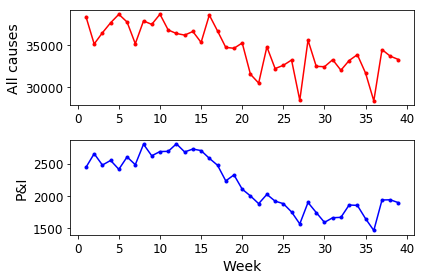

In [40]:
%matplotlib inline
plt.figure(2)


plt.subplot(2,1,1)
plt.plot(data2['WEEK'],data2['All causes, by age (years), All Ages**'],'.r-')
plt.ylabel('All causes')
plt.subplot(2,1,2)
plt.plot(data2['WEEK'],data2['P&I† Total'],'.b-')
plt.xlabel('Week')
plt.ylabel('P&I')
plt.tight_layout()
plt.show()

In [21]:
data3=data2.groupby(['Season']).sum()

In [26]:
data3['Season']=np.array([1,2,3])

In [35]:
data3.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3 entries, 1 to 3
Data columns (total 11 columns):
MMWR YEAR                                 3 non-null int64
All causes, by age (years), All Ages**    3 non-null float64
All causes, by age (years), ≥65           3 non-null float64
All causes, by age (years), 45–64         3 non-null float64
All causes, by age (years), 25–44         3 non-null float64
All causes, by age (years), 1–24          3 non-null float64
All causes, by age (years), LT 1          3 non-null float64
P&I† Total                                3 non-null float64
Location 2                                0 non-null float64
WEEK                                      3 non-null int32
Season                                    3 non-null int32
dtypes: float64(8), int32(2), int64(1)
memory usage: 264.0 bytes


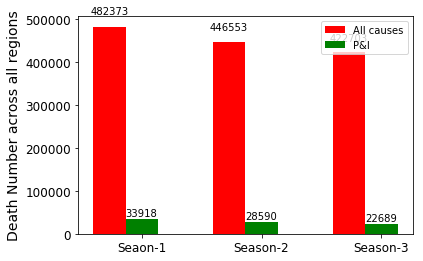

In [50]:
N=3
ind=np.arange(N)
width=0.27

fig=plt.figure()
fig=fig.add_subplot(111)

y=data3['All causes, by age (years), All Ages**']
bar1=fig.bar(ind,y,width,color='r')
z=data3['P&I† Total']
bar2=fig.bar(ind+width,z,width,color='g')

fig.set_ylabel('Death Number across all regions')
fig.set_xticks(ind+width)
fig.set_xticklabels(('Seaon-1','Season-2','Season-3'))
fig.legend((bar1[0],bar2[0]),('All causes','P&I'))


def autolabel(bars):
    for bar in bars:
        h = bar.get_height()
        fig.text(bar.get_x()+bar.get_width()/2., 1.05*h, '%d'%int(h),
                ha='center', va='bottom')
autolabel(bar1)
autolabel(bar2)
plt.show()

#Each season consists of 13 weeks

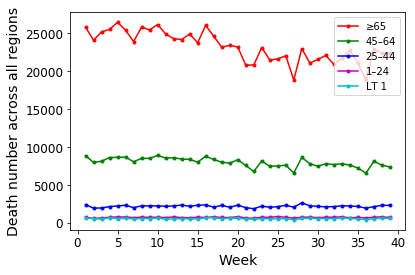

In [49]:
fig2=plt.figure()
l1=plt.plot(data2['WEEK'],data2['All causes, by age (years), ≥65'],'.r-', label='≥65')
l2=plt.plot(data2['WEEK'],data2['All causes, by age (years), 45–64'],'.g-',label='45–64')
l3=plt.plot(data2['WEEK'],data2['All causes, by age (years), 25–44'],'.b-',label='25–44')
l4=plt.plot(data2['WEEK'],data2['All causes, by age (years), 1–24'],'.m-',label='1–24')
l5=plt.plot(data2['WEEK'],data2['All causes, by age (years), LT 1'],'.c-',label='LT 1')
plt.legend(loc='upper right')
plt.xlabel('Week')
plt.ylabel('Death number across all regions')
plt.show()

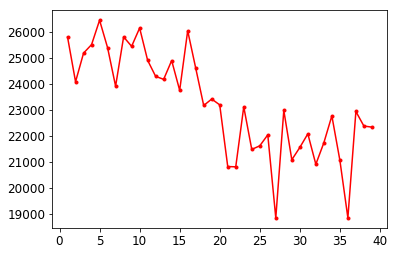

In [53]:
plt.figure()
plt.plot(data2['WEEK'],data2['All causes, by age (years), ≥65'],'.r-', label='≥65')

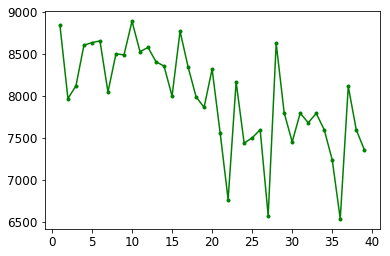

In [54]:
plt.figure()
plt.plot(data2['WEEK'],data2['All causes, by age (years), 45–64'],'.g-',label='45–64')

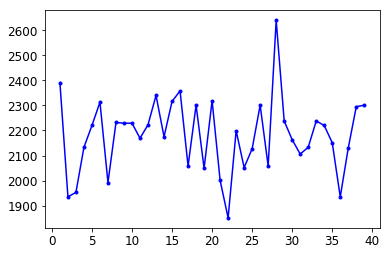

In [55]:
plt.figure()
plt.plot(data2['WEEK'],data2['All causes, by age (years), 25–44'],'.b-',label='25–44')

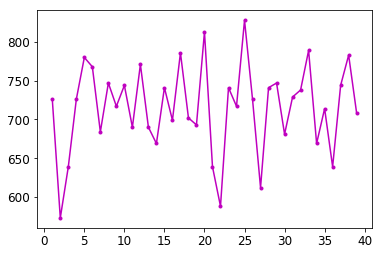

In [56]:
plt.figure()
plt.plot(data2['WEEK'],data2['All causes, by age (years), 1–24'],'.m-',label='1–24')

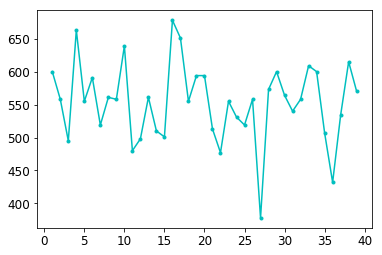

In [57]:
plt.figure()
l5=plt.plot(data2['WEEK'],data2['All causes, by age (years), LT 1'],'.c-',label='LT 1')

Death toll of people with age greater than or equal to 65 years old actually saw of great decrease in the later half of the year, while the death toll of people in other age group seem to remain pretty stable throughout the year.